In [1]:
import PyDSTool
from pylab import plot, show, linspace, xlabel, ylabel
from matplotlib import pyplot as pl
pl.rcParams['figure.dpi'] = 150

In [2]:
%matplotlib inline

# ODE pre-analysis

In [3]:
# we must give a name
DSargs = PyDSTool.args(name='Gata3')

In [4]:
# parameters
DSargs.pars = {'alpha':0.02, 'k_g':5.0, 'k':1.0, 'S':0.0}

In [5]:
# rhs of the differential equation
DSargs.varspecs = {'v': 'alpha*S + k_g*v^2/((1+v)^2) - k*v'}

In [6]:
# initial conditions
DSargs.ics      = {'v': 1.0}

Text(0,0.5,'Gata3')

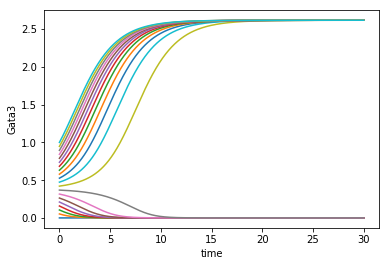

In [7]:
# solve ODE
DSargs.tdomain = [0,30] #integration time
ode = PyDSTool.Generator.Vode_ODEsystem(DSargs) #instance of 'Generator' class

pl.figure()
for i, v0 in enumerate(linspace(0,1,20)):
    ode.set( ics = { 'v': v0 } )                       # Initial condition
    tmp = ode.compute('pol%3f' % i).sample()           # Trajectories are called pol0, pol1, ...
    plot(tmp['t'], tmp['v'])
xlabel('time')
ylabel('Gata3')

# Bifurcation diagram

In [8]:
# Prepare the system to start close to a steady state
ode.set(pars = {'S': 0.0} ) # bifurcation parameter
ode.set(ics =  {'v': 0.0} ) # starting near a steady-state

## Experiment 1

/home/user/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 5)

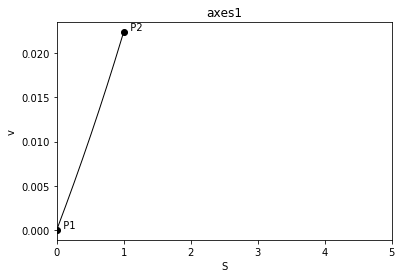

In [9]:
#--- experiment 1 ---#
# Bifurcation diagram
PyCont = PyDSTool.ContClass(ode)                 # Set up continuation class
PCargs = PyDSTool.args(name='EQ1', type='EP-C')  # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['S']                      # control parameter(s) (it should be among those specified in DSargs.pars)

PCargs.MaxNumPoints = 1000                       # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 1e-3
PCargs.MinStepSize  = 1e-4
PCargs.StepSize     = 1e-3

PCargs.LocBifPoints = 'LP'                       # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                       # to tell unstable from stable branches

PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()
pl.figure()
PyCont.display(['S','v'], stability=True)        # stable and unstable branches as solid and dashed curves, resp.
pl.xlim([0,5])

## Experiment 2

LP Point found 


(0, 5)

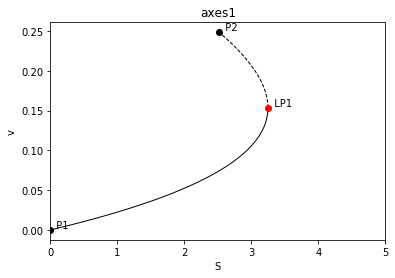

In [10]:
#--- experiment 2 ---#
# Bifurcation diagram
PyCont = PyDSTool.ContClass(ode)                 # Set up continuation class
PCargs = PyDSTool.args(name='EQ1', type='EP-C')  # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['S']                      # control parameter(s) (it should be among those specified in DSargs.pars)

PCargs.MaxNumPoints = 4000                       # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 1e-3
PCargs.MinStepSize  = 1e-4
PCargs.StepSize     = 1e-3

PCargs.LocBifPoints = 'LP'                       # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                       # to tell unstable from stable branches

PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()
pl.figure()
PyCont.display(['S','v'], stability=True)        # stable and unstable branches as solid and dashed curves, resp.
pl.xlim([0,5])

## Experiment 3

LP Point found 
LP Point found 


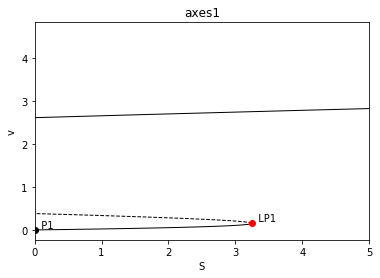

In [11]:
#--- experiment 3 ---#
# Bifurcation diagram
PyCont = PyDSTool.ContClass(ode)                 # Set up continuation class
PCargs = PyDSTool.args(name='EQ1', type='EP-C')  # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['S']                      # control parameter(s) (it should be among those specified in DSargs.pars)

PCargs.MaxNumPoints = 1000                       # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 1e-1
PCargs.MinStepSize  = 1e-4
PCargs.StepSize     = 1e-2

PCargs.LocBifPoints = 'LP'                       # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                       # to tell unstable from stable branches

PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()
pl.figure()
PyCont.display(['S','v'], stability=True)        # stable and unstable branches as solid and dashed curves, resp.
pl.xlim([0,5])
PyCont.plot.toggleLabels(visible='off', bylabel=['LP2','P2'])